<a href="https://colab.research.google.com/github/SuperGeekBrain/coal-exploration/blob/master/Computing_Historical_Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computing Historical Volatility**

In this notebook, we will be computing the **20 trading days** (or 1 month) historical volatility for the time period starting from **20th April, 2016 to 13th April, 2018.** Historical Volatility gauges the fluctuations of underlying securities by measuring the price changes over a predetermined period of time in the past.

In [ ]:
#Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# For making attractive and informative statistical graph
plt.style.use('seaborn-darkgrid')

**Stock data**

We will fetch the Apple data using the pandas **read_csv** function. We will then, print the data to visualize it by using the head() function which prints the top 5 rows of the dataset.

This data is available in the downloadable unit of this course in the last section. You can also download Apple stock data from finance.yahoo.com.

In [ ]:
data = pd.read_csv('apple_stock_data.csv')
data.head()

,Date,Adj_Close
0,20-Apr-16,102.872663
1,21-Apr-16,101.758761
2,22-Apr-16,101.480285
3,25-Apr-16,100.904129
4,26-Apr-16,100.203140


**Computing Log Returns**

Now we will compute the daily log returns by using the **shift()** function for adjusted closing prices of the security. We make use of the numpy library for computing log of today's closing price divided by yesterday's closing price. The log returns are stored in the DataFrame data under the column header 'Log Returns'.

In [ ]:
data['Log Returns'] = np.log(data['Adj_Close']/data['Adj_Close'].shift(1))

**Computing Historical Volatility**

The one month (or 20 trading days) historical volatility will be computed by using the **DataFrame.rolling(window).std()** function which computes the rolling standard deviation of data['Log Returns'] for a period of 20 trading days. The standard deviation is multiplied by 100 to compute the percentage value for volatility. The historical volatility will be stored in the DataFrame under the column header '20 day Historical Volatility'.

In [ ]:
data['20 day Historical Volatility'] = 100*data['Log Returns'].rolling(window=20).std()

**Plot the volatility**

We will now plot the historical volatilty to visualise how it changes over the period of one year.

<function matplotlib.pyplot.show>

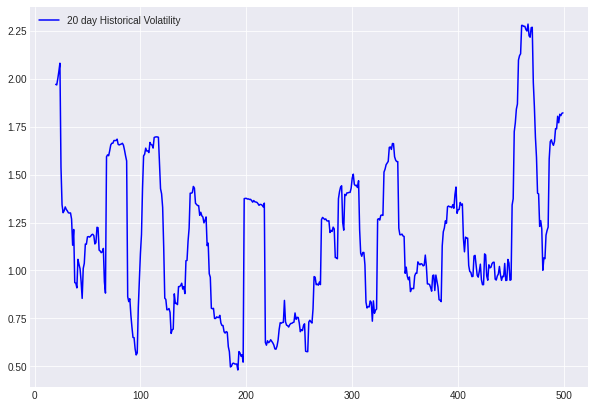

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(data['20 day Historical Volatility'], color = 'b', label = '20 day Historical Volatility')
plt.legend(loc='best')
plt.show